In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#import python code from seperate files
from utils.generators import gen_shapes, gen_noise, gen_image, gen_details
from utils.helpers import gen_grid_image

rnd=np.random.default_rng(31)


In [6]:
num_shapes=50
max_radius=1/20
min_radius=1/40

num_noise=300
max_line=1/20
min_line=1/80

im_size=1024
max_lw=0.15
min_lw=0.1

radius = int(max_radius*im_size)+1
shapes_im_size = 2*radius+1

fluct=2

images = []
labels = []
for i in range(2) :
    shapes = gen_shapes(rnd, num_shapes, max_radius, min_radius, False, False)
    noise = gen_noise(rnd, num_noise, max_line, min_line)
    img, sha, nse = gen_image(shapes, noise, rnd, im_size, max_lw, min_lw, False)
    shapes_img = gen_details(shapes_im_size, sha, img, rnd, fluct)
    labels.extend(sha)
    images.extend(shapes_img)

plt.close()

np.savez_compressed('data/data.npz', images=images, labels=labels)

In [10]:
loaded  = np.load('data/data.npz')
images = loaded['images']
labels = loaded['labels']

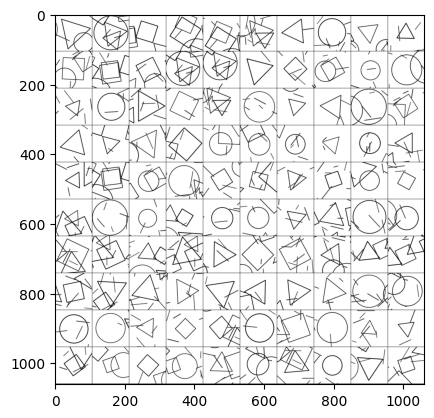

In [8]:
grid = (10,10)
grid_image, grid_pos = gen_grid_image(images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_grid.png')
plt.close()

plt.imshow(mpimg.imread('data/tmp_grid.png'))

In [9]:
print("\nposition : shape : [size, rotation, line_width]")

np.set_printoptions(precision=3, suppress=True)
for i in range(20):
    print(f"{grid_pos[i]} : {int(labels[i][0])} {labels[i][3:]}")


position : shape : [size, rotation, line_width]
(0, 0) : 3 [50.388  0.74   0.135]
(0, 1) : 2 [48.817  0.     0.126]
(0, 2) : 4 [35.223  0.482  0.143]
(0, 3) : 4 [45.676  0.22   0.15 ]
(0, 4) : 4 [34.002  0.385  0.107]
(0, 5) : 3 [42.293  0.663  0.12 ]
(0, 6) : 3 [39.681  1.658  0.133]
(0, 7) : 2 [39.209  0.     0.143]
(0, 8) : 3 [33.609  1.174  0.11 ]
(0, 9) : 3 [28.765  2.067  0.149]
(1, 0) : 4 [43.407  0.737  0.104]
(1, 1) : 4 [33.657  0.906  0.116]
(1, 2) : 4 [37.923  1.246  0.132]
(1, 3) : 3 [40.263  0.668  0.127]
(1, 4) : 3 [31.491  1.416  0.125]
(1, 5) : 3 [44.806  0.793  0.148]
(1, 6) : 4 [33.351  1.555  0.132]
(1, 7) : 4 [35.802  1.305  0.111]
(1, 8) : 2 [27.48  0.    0.11]
(1, 9) : 2 [43.154  0.     0.119]
